In [ ]:
# Model http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/mpi/pose_iter_160000.caffemodel

In [37]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

In [38]:
ls

image.jpg  paper.pdf  pose.caffemodel  Pose Estimation.ipynb  pose.prototxt


In [39]:
protoFile = 'pose.prototxt'
weightsFile = 'pose.caffemodel'

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [46]:
frame = cv2.imread('image.jpg')

frameHeight, frameWidth, _ = frame.shape

inWidth = 368
inHeight = 368

inpBlob = cv2.dnn.blobFromImage(frame, 1./255, (inWidth, inHeight), 
                                (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

In [47]:
output = net.forward()

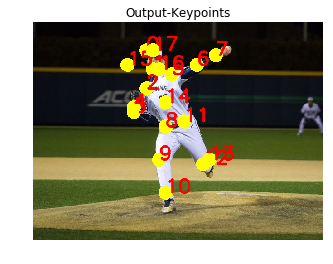

In [48]:
H = output.shape[2]
W = output.shape[3]
points = []
threshold = .1
nPoints = 18
for i in range(nPoints):
    probMap = output[0, i, :, :]
 
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
     
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H
 
    if prob > threshold : 
        cv2.circle(frame, (int(x), int(y)), 15, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 0, 255), 3, lineType=cv2.LINE_AA)
 
        points.append((int(x), int(y)))
    else :
        points.append(None)

frame_rgb = frame[..., ::-1]        
        
plt.imshow(frame_rgb)
plt.title('Output-Keypoints')
plt.axis('off')
plt.show()
cv2.destroyAllWindows()